# Simple linear regression 📈

## **Introduction**


Simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this Project, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [11]:
# Import relevant Python libraries and modules.
#data manipulation
import numpy as np
import pandas as pd

#statistics
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars.

In [12]:
# IMPORT YOUR DATA.
data = pd.read_csv("marketing_sales_data.csv")

## **Step 2: Data exploration 🔎** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [13]:
# Display the first 10 rows of the data.
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


**Question:** What do you observe about the different variables included in the data?

- The data includes the following information:
    - TV promotion budget (expressed as "Low", "Medium", or "High") 
    - Radio promotion budget
    - Social media promotion budget
    - Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
        - Note: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.
    - Sales accrued from the promotion

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [14]:
# Display number of rows, number of columns.
data.shape

(572, 5)

**Question:** How many rows and columns exist in the data?

There are 572 rows and 5 columns in the data

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [15]:
# Use .sum() to get the number of rows that contain missing values.
data.isna().any(axis=1).sum()

3

If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

**Question:** How many rows containing missing values?

- There are 3 rows containing missing values, which is not that many, considering the total number of rows. It would be appropriate to drop these rows that contain missing values to proceed with preparing the data for modeling.

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [16]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.
copy = data.dropna(axis=0)

In [17]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values

copy.isna().any(axis=1).sum()


0

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

In [18]:
# Create plot of pairwise relationships.
sns.pairplot(copy)

**Question:** Is the assumption of linearity met?

- In the scatter plot of `Sales` over `Radio`, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

## **Step 3: Model building 🏗️** 

Select only the columns that are needed for the model.

In [19]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.
ols_data = copy[['Radio','Sales']]

Now, display the first 10 rows of the new DataFrame to better understand the data.

In [20]:
# Display first 10 rows of the new DataFrame.
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [21]:
# Write the linear regression formula.
ols_formula = "Sales ~ Radio"

Now, implement the ordinary least squares (OLS) approach for linear regression.

In [22]:
# Implement OLS.
OLS = ols(formula=ols_formula, data=ols_data)

Now, create a linear regression model for the data and fit the model to the data.

In [23]:
# Fit the model to the data.
model = OLS.fit()

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [24]:
# Get summary of results.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          2.07e-176
Time:                        22:36:34   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What is the y-intercept? 

The y-intercept or beta zero is 41.5326

**Question:** What is the slope? 

The slope or beta one is 8.1733

**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


y = 8.1733 * x + 41.5326

**Question:** What does the slope mean in this context?

- One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
- Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

Now that you've built the linear regression model and fit it to the data, finish checking the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit regression line.

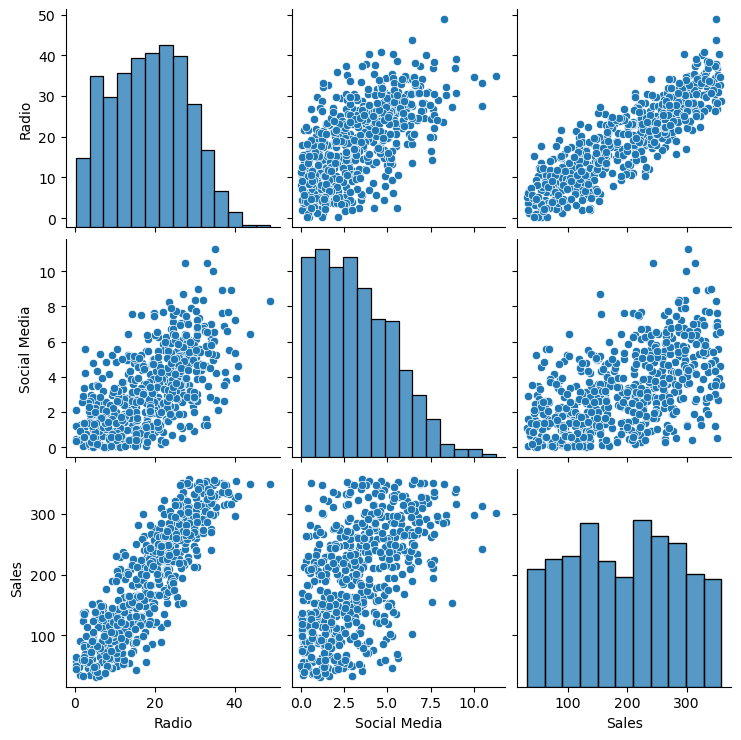

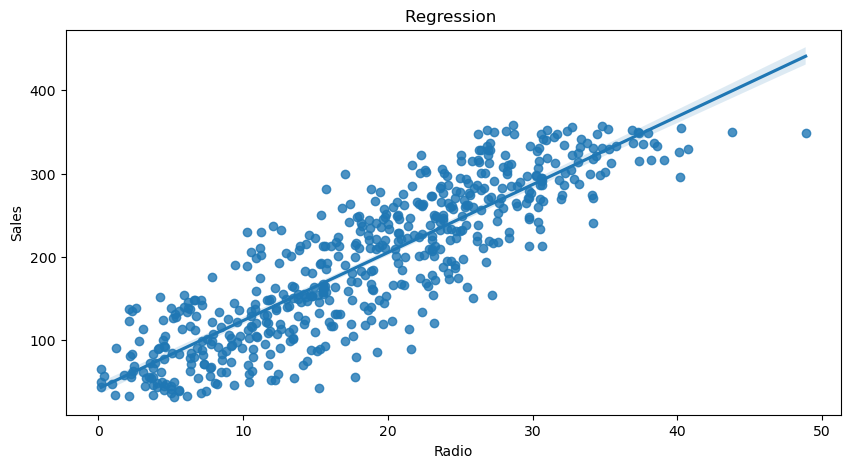

In [25]:
# Plot the OLS data with the best fit regression line.
plt.figure(figsize=(10,5))
fig=sns.regplot(x=ols_data['Radio'], y=ols_data['Sales'])
fig.set_title('Regression ')
plt.show()

**Question:** What do you observe from the preceding regression plot?

- The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

Now, check the normality assumption. Get the residuals from the model.

In [26]:
# Get the residuals from the model.
residuals = model.resid

Now, visualize the distribution of the residuals.

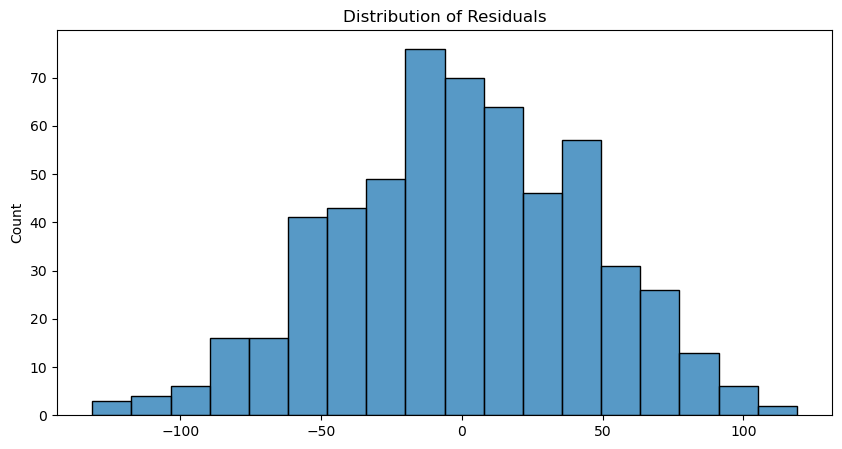

In [27]:
# Visualize the distribution of the residuals.
plt.figure(figsize=(10,5))
fig = sns.histplot(residuals)
fig.set_title('Distribution of Residuals')
plt.show()

**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

- Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

Next, create a Q-Q plot to confirm the assumption of normality.

<Figure size 800x400 with 0 Axes>

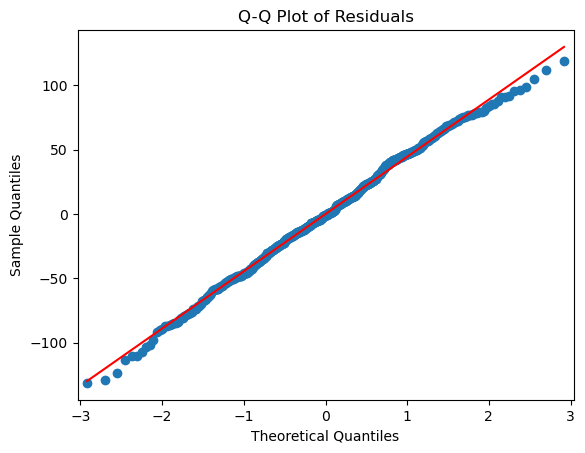

In [28]:
# Create a Q-Q plot.
plt.figure(figsize=(8,4))
fig = sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

**Question:** Is the assumption of normality met?

- In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [29]:
# Get fitted values.
fitted_value = model.fittedvalues

Next, create a scatterplot of the residuals against the fitted values.

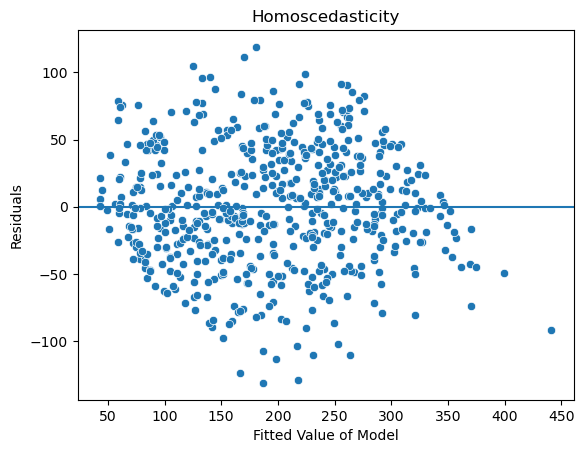

In [30]:
# Create a scatterplot of residuals against fitted values.
fig = sns.scatterplot(x=fitted_value, y=residuals)
fig.axhline(0)
fig.set_xlabel('Fitted Value of Model')
fig.set_ylabel('Residuals')
fig.set_title('Homoscedasticity')
plt.show()

**Question:** Are the assumptions of independent observation and homoscedasticity met?


- In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

## **Considerations**

**How would you present your findings to others?**

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. 
    One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
    Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.


The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.

**What summary would you provide to stakeholders?**

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be accociated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services.

**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)